In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session




Loading the dataset

In [2]:
trip_dataset = pd.read_csv("For_modeling.csv")
trip_dataset

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [3]:
## Checking the first 5 rows of the dataset

trip_dataset.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [4]:
## Checking the last 5 rows of the dataset

trip_dataset.tail()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
9601134,9830306,67,6930,37.562607,127.051308,37.562607,127.051308,0.000000,12,31,...,51,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601135,9830307,58,8320,37.511982,127.085052,37.476028,127.105942,4.402263,12,31,...,53,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601136,9830308,118,2730,37.506199,127.003944,37.514870,127.015282,1.389156,12,31,...,58,1,-5.4,0.0,1.3,46.0,0.0,0.0,-5.0,49.0
9601137,9830309,90,17170,37.489750,126.927467,37.565903,126.901184,8.779307,12,31,...,26,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0
9601138,9830310,116,1410,37.585655,127.075050,37.585655,127.075050,0.000000,12,31,...,30,1,-5.2,0.0,1.6,47.0,0.0,0.0,-5.1,53.0


In [5]:
## Shape of the dataset

trip_dataset.shape

(9601139, 26)

In [6]:
## Dataset Information
trip_dataset.info

<bound method DataFrame.info of          Unnamed: 0  Duration  Distance      PLong       PLatd      DLong  \
0                 0         3        50  37.544666  126.888359  37.544666   
1                 1        24      7670  37.506199  127.003944  37.551250   
2                 2         8      1390  37.544590  127.057083  37.537014   
3                 3         8      1820  37.571102  127.023560  37.561447   
4                 4         4       850  37.573242  127.015907  37.565849   
...             ...       ...       ...        ...         ...        ...   
9601134     9830306        67      6930  37.562607  127.051308  37.562607   
9601135     9830307        58      8320  37.511982  127.085052  37.476028   
9601136     9830308       118      2730  37.506199  127.003944  37.514870   
9601137     9830309        90     17170  37.489750  126.927467  37.565903   
9601138     9830310       116      1410  37.585655  127.075050  37.585655   

              DLatd  Haversine  Pmonth  Pda

In [7]:
## Checking for the duplicate values and dropping them

trip_dataset.drop_duplicates(keep = False, inplace = True)

In [8]:
trip_dataset.shape

(9601139, 26)

In [9]:
## Checking for null values in the dattrip_dataset

trip_dataset.isna().sum()

Unnamed: 0    0
Duration      0
Distance      0
PLong         0
PLatd         0
DLong         0
DLatd         0
Haversine     0
Pmonth        0
Pday          0
Phour         0
Pmin          0
PDweek        0
Dmonth        0
Dday          0
Dhour         0
Dmin          0
DDweek        0
Temp          0
Precip        0
Wind          0
Humid         0
Solar         0
Snow          0
GroundTemp    0
Dust          0
dtype: int64

**There are no null values in the dataset**

In [10]:
## Check  the statistical values of the dataset

trip_dataset.describe

<bound method NDFrame.describe of          Unnamed: 0  Duration  Distance      PLong       PLatd      DLong  \
0                 0         3        50  37.544666  126.888359  37.544666   
1                 1        24      7670  37.506199  127.003944  37.551250   
2                 2         8      1390  37.544590  127.057083  37.537014   
3                 3         8      1820  37.571102  127.023560  37.561447   
4                 4         4       850  37.573242  127.015907  37.565849   
...             ...       ...       ...        ...         ...        ...   
9601134     9830306        67      6930  37.562607  127.051308  37.562607   
9601135     9830307        58      8320  37.511982  127.085052  37.476028   
9601136     9830308       118      2730  37.506199  127.003944  37.514870   
9601137     9830309        90     17170  37.489750  126.927467  37.565903   
9601138     9830310       116      1410  37.585655  127.075050  37.585655   

              DLatd  Haversine  Pmonth  P

### Visualize the data

In [11]:
trip_dataset.columns

Index(['Unnamed: 0', 'Duration', 'Distance', 'PLong', 'PLatd', 'DLong',
       'DLatd', 'Haversine', 'Pmonth', 'Pday', 'Phour', 'Pmin', 'PDweek',
       'Dmonth', 'Dday', 'Dhour', 'Dmin', 'DDweek', 'Temp', 'Precip', 'Wind',
       'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust'],
      dtype='object')

##### Check the distribution of the features

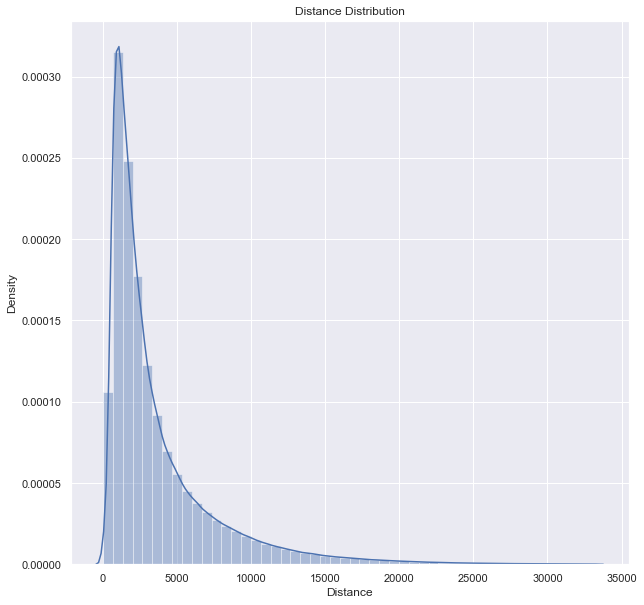

In [12]:
## Distribution of Distance

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Distance"])
plt.title("Distance Distribution")
plt.show()

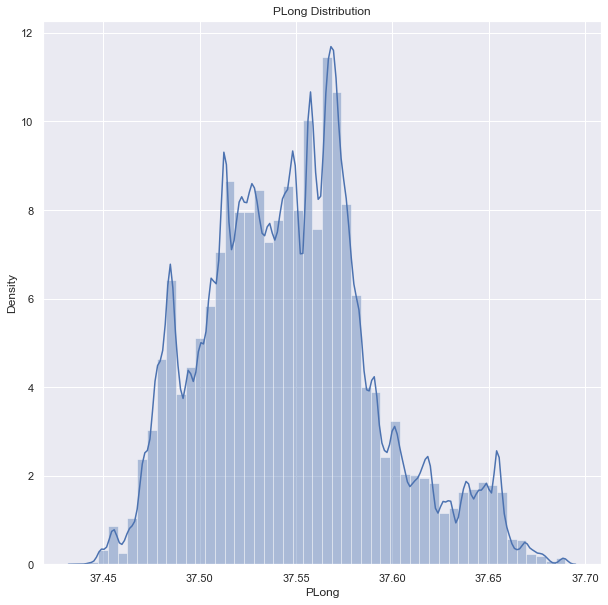

In [13]:
## Distribution of Plong

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["PLong"])
plt.title("PLong Distribution")
plt.show()

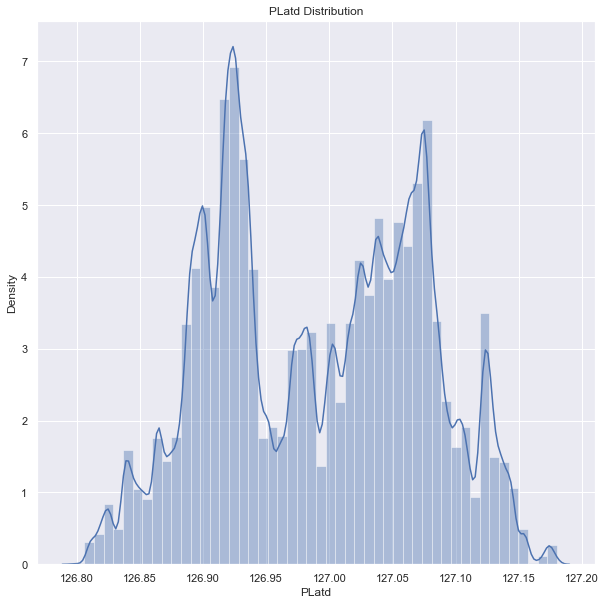

In [14]:
## Distribution of PLatd

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["PLatd"])
plt.title("PLatd Distribution")
plt.show()

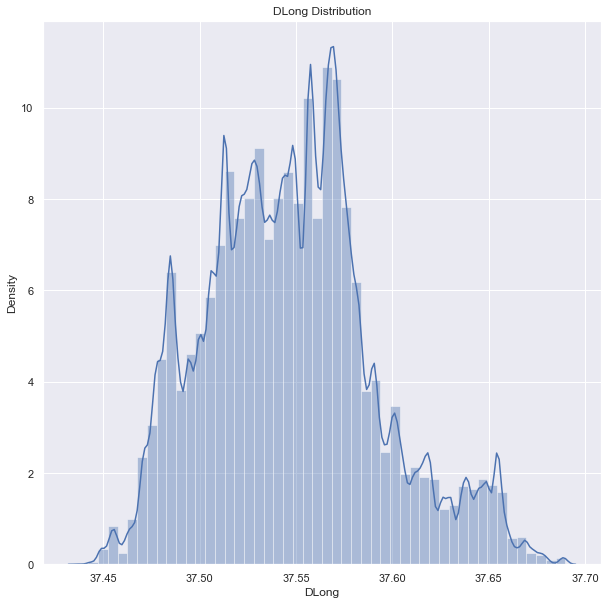

In [15]:
## Distribution of Dlong

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["DLong"])
plt.title("DLong Distribution")
plt.show()

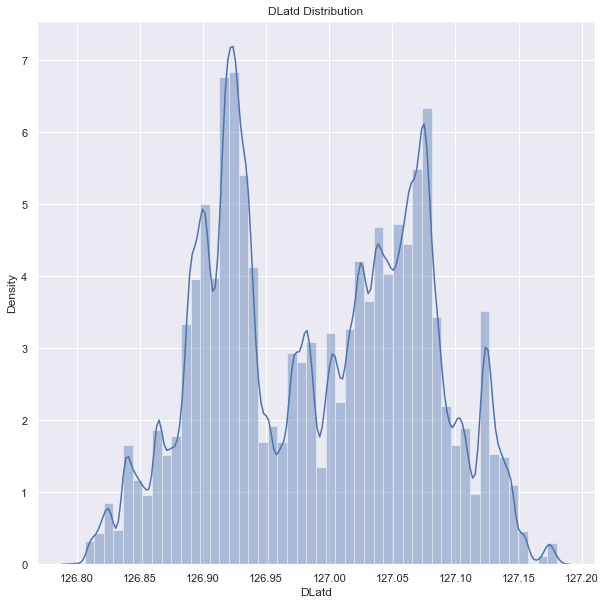

In [16]:
## Distribution of DLatd

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["DLatd"])
plt.title("DLatd Distribution")
plt.show()

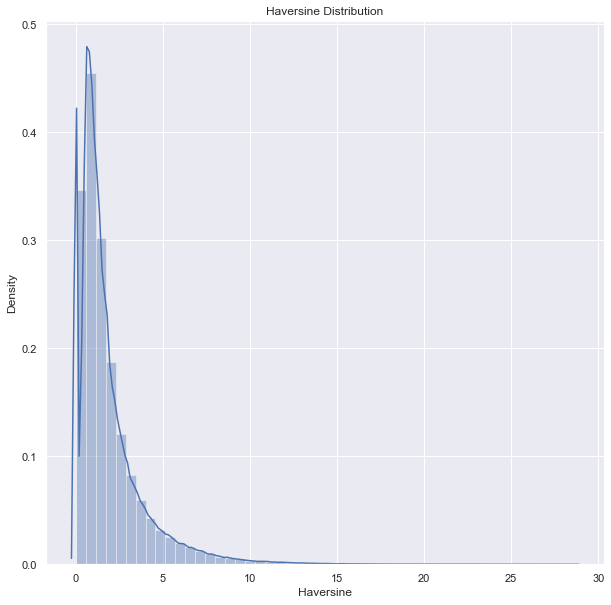

In [17]:
## Distribution of Haversine

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Haversine"])
plt.title("Haversine Distribution")
plt.show()

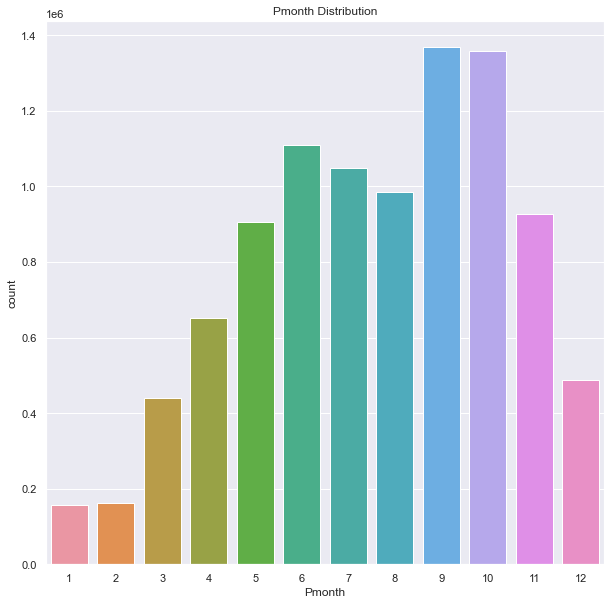

In [18]:
## Distribution of Pmonth

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Pmonth"])
plt.title("Pmonth Distribution")
plt.show()

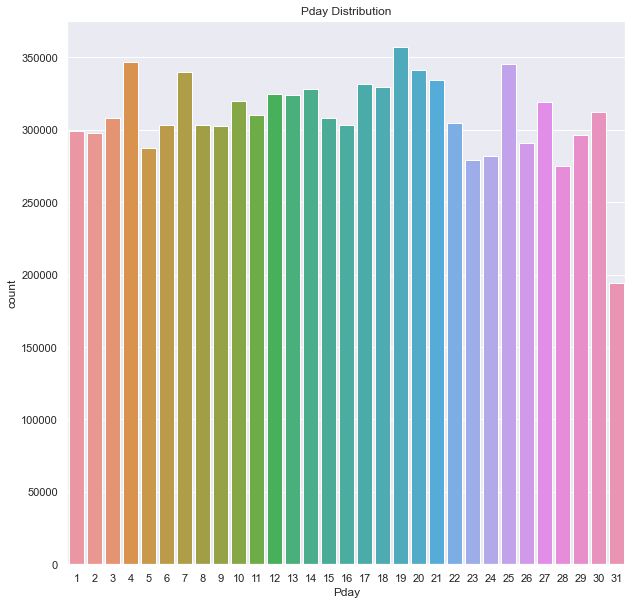

In [19]:
## Distribution of Pday

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Pday"])
plt.title("Pday Distribution")
plt.show()

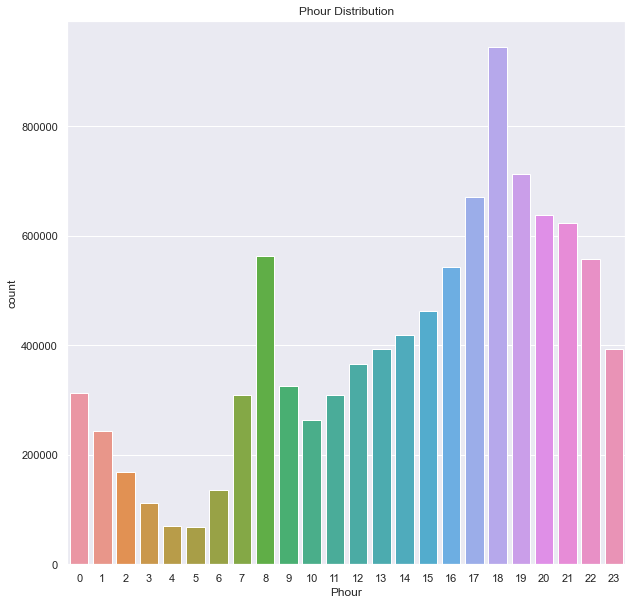

In [20]:
## Distribution of Phour

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Phour"])
plt.title("Phour Distribution")
plt.show()

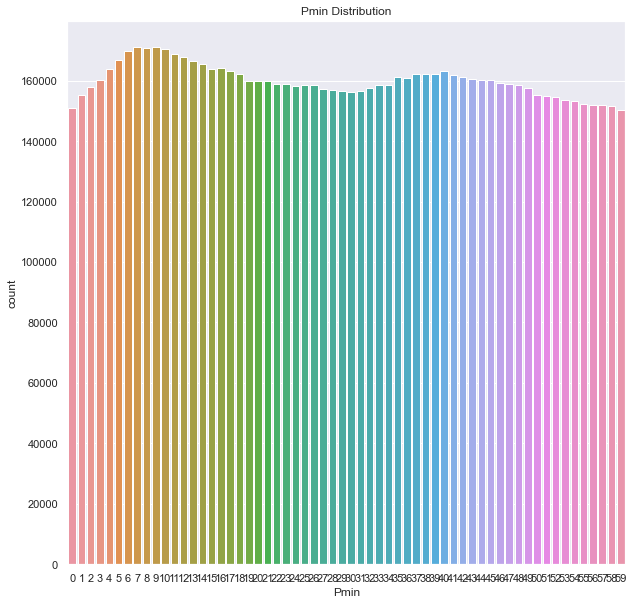

In [21]:
## Distribution of Pmin

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Pmin"])
plt.title("Pmin Distribution")
plt.show()

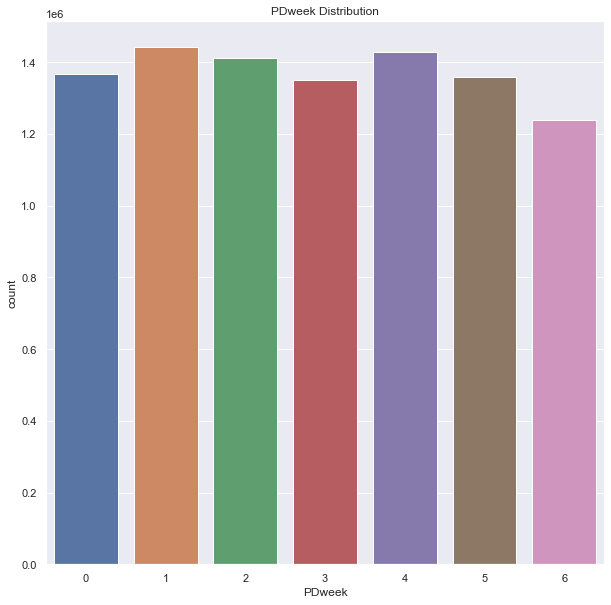

In [22]:
## Distribution of Pdweek

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["PDweek"])
plt.title("PDweek Distribution")
plt.show()

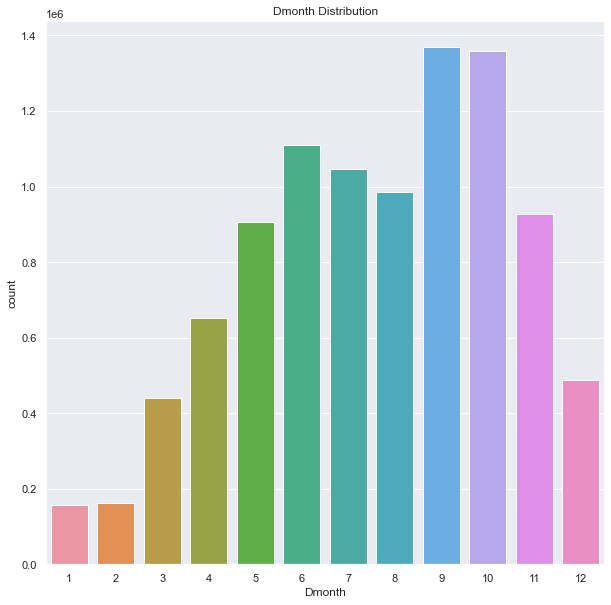

In [23]:
## Distribution of Dmonth

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Dmonth"])
plt.title("Dmonth Distribution")
plt.show()

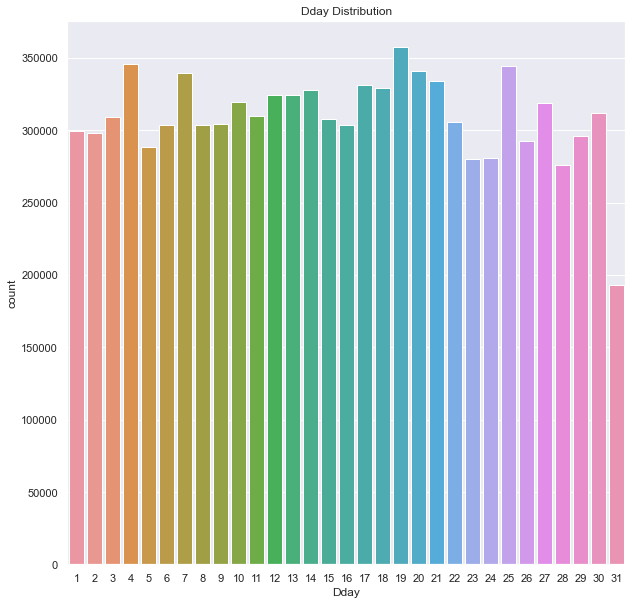

In [24]:
## Distribution of Dday

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Dday"])
plt.title("Dday Distribution")
plt.show()

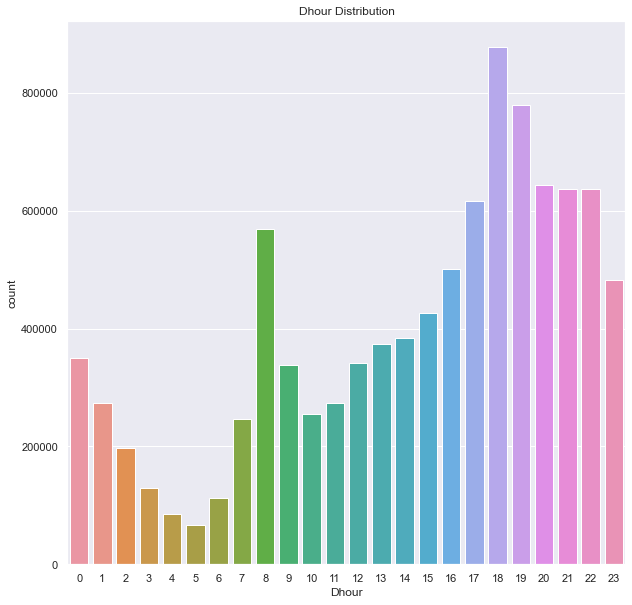

In [25]:
## Distribution of Dhour

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Dhour"])
plt.title("Dhour Distribution")
plt.show()

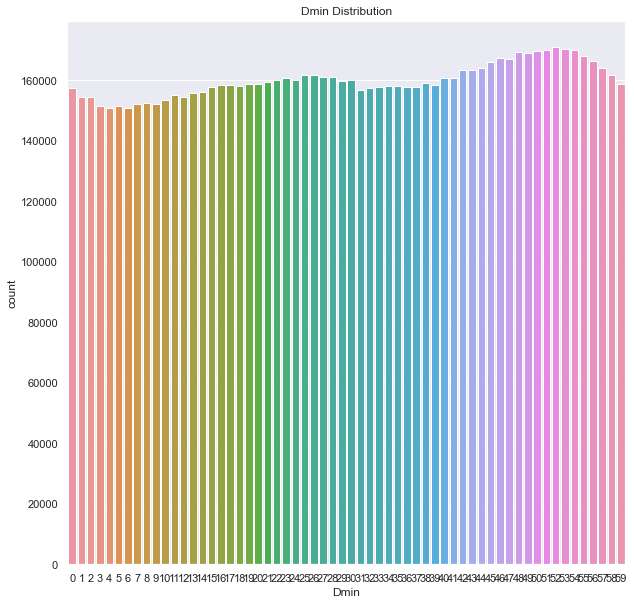

In [26]:
## Distribution of Dmin

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["Dmin"])
plt.title("Dmin Distribution")
plt.show()

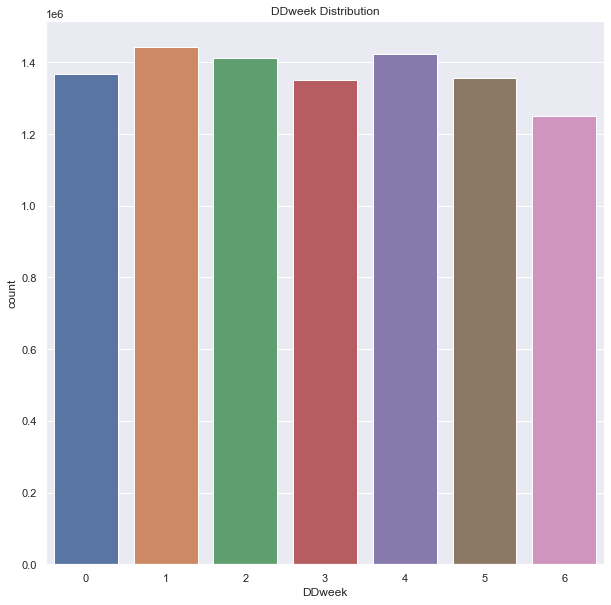

In [27]:
## Distribution of DDweek

plt.figure(figsize=(10,10))
sns.countplot(trip_dataset["DDweek"])
plt.title("DDweek Distribution")
plt.show()

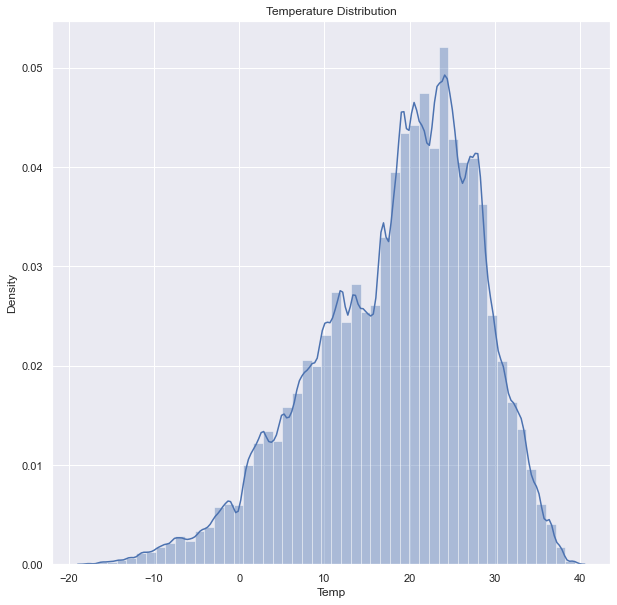

In [28]:
## Distribution of Temp

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Temp"])
plt.title("Temperature Distribution")
plt.show()

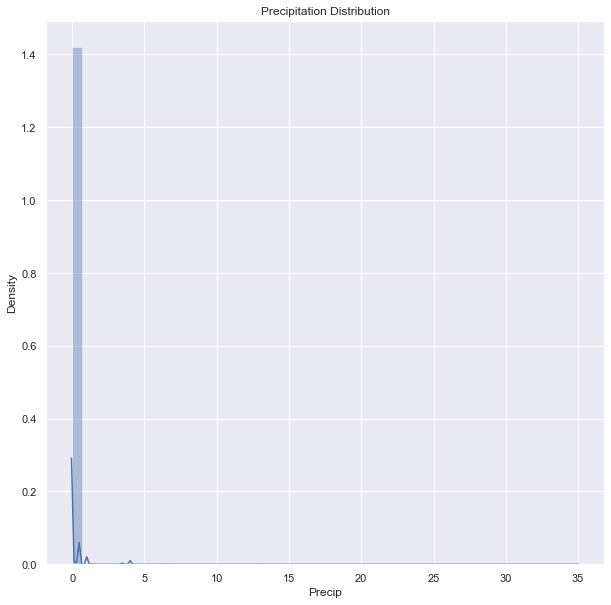

In [29]:
## Distribution of Precip

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Precip"])
plt.title("Precipitation Distribution")
plt.show()

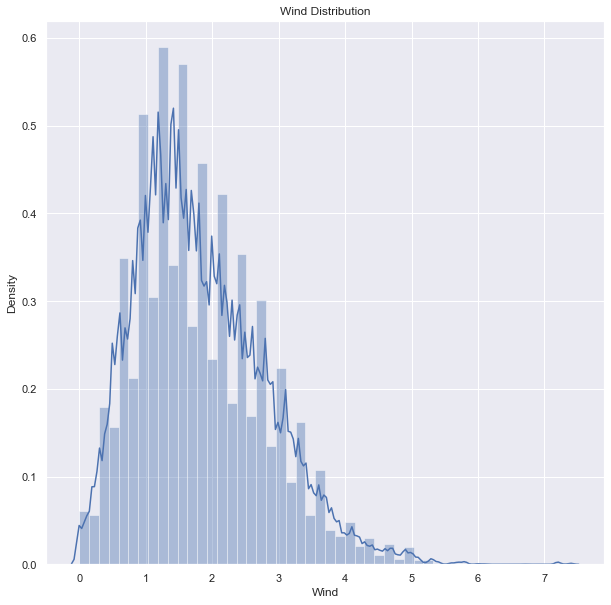

In [30]:
## Distribution of Wind

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Wind"])
plt.title("Wind Distribution")
plt.show()

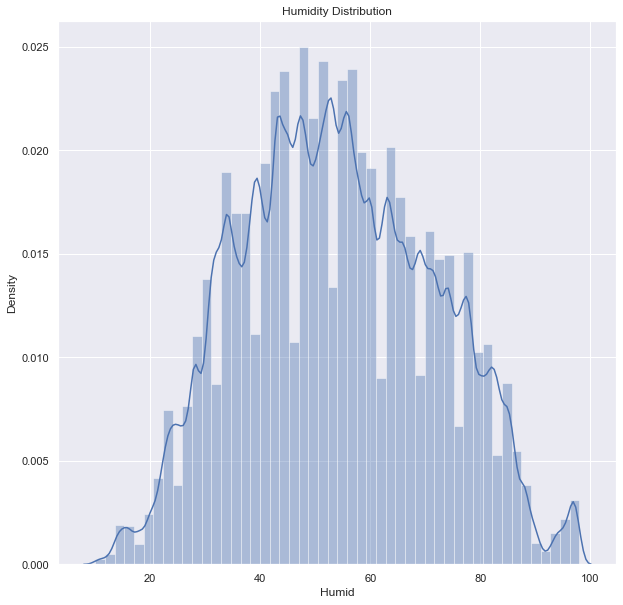

In [31]:
## Distribution of Humid

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Humid"])
plt.title("Humidity Distribution")
plt.show()

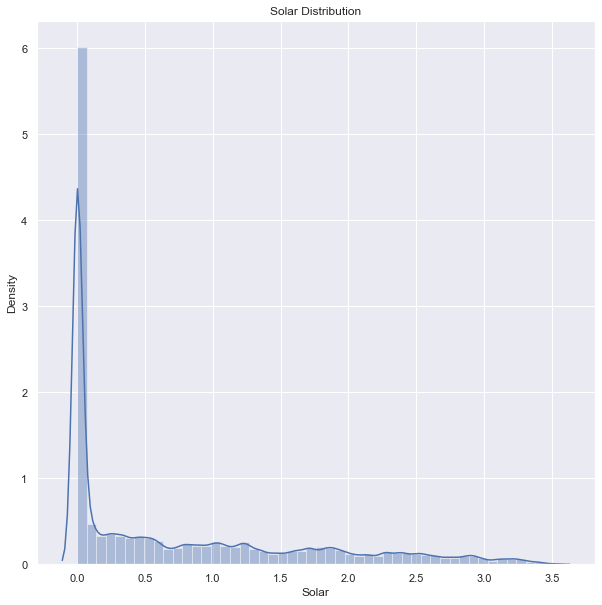

In [32]:
## Distribution of Solar

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Solar"])
plt.title("Solar Distribution")
plt.show()

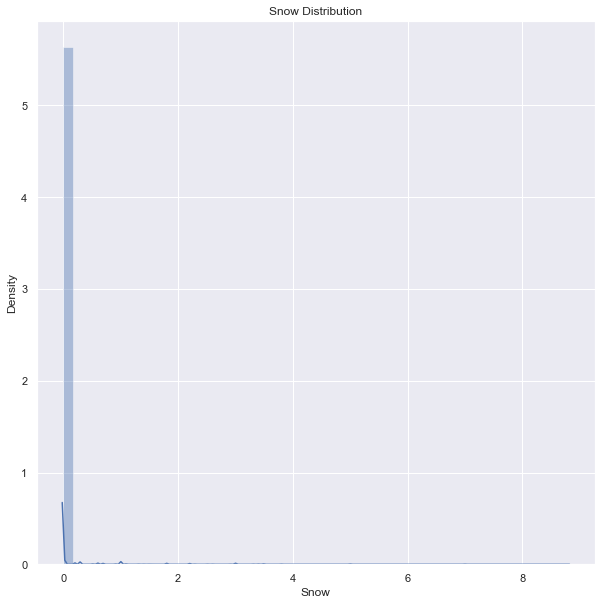

In [33]:
## Distribution of Snow

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Snow"])
plt.title("Snow Distribution")
plt.show()

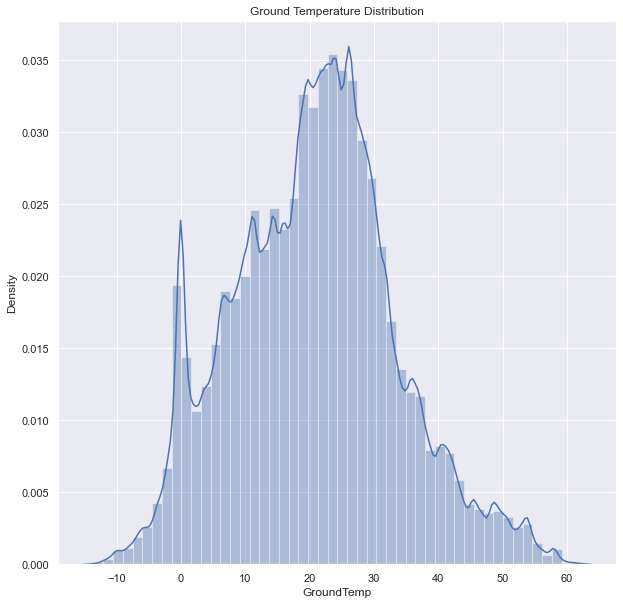

In [34]:
## Distribution of GroundTemp

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["GroundTemp"])
plt.title("Ground Temperature Distribution")
plt.show()

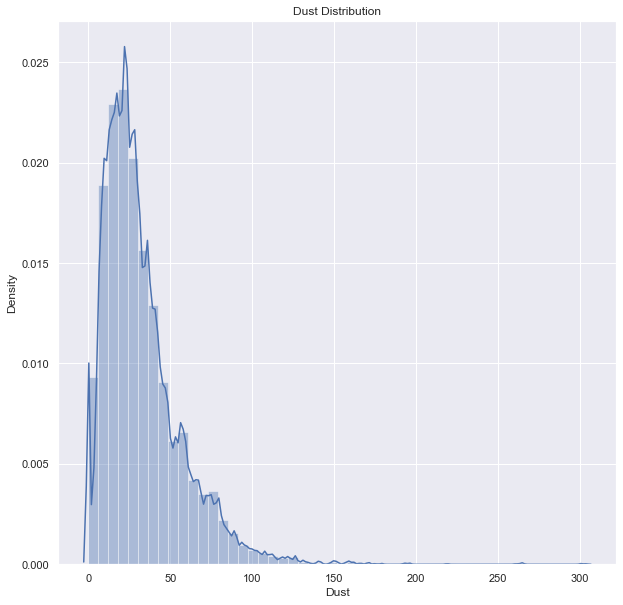

In [35]:
## Distribution of Dust

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Dust"])
plt.title("Dust Distribution")
plt.show()

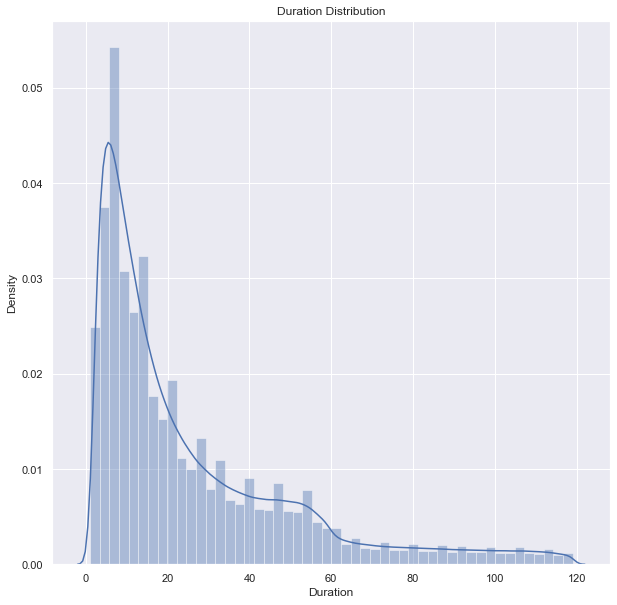

In [36]:
## Distribution of Duration

sns.set()
plt.figure(figsize=(10,10))
sns.distplot(trip_dataset["Duration"])
plt.title("Duration Distribution")
plt.show()

In [37]:
trip_dataset.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


#### Outliers

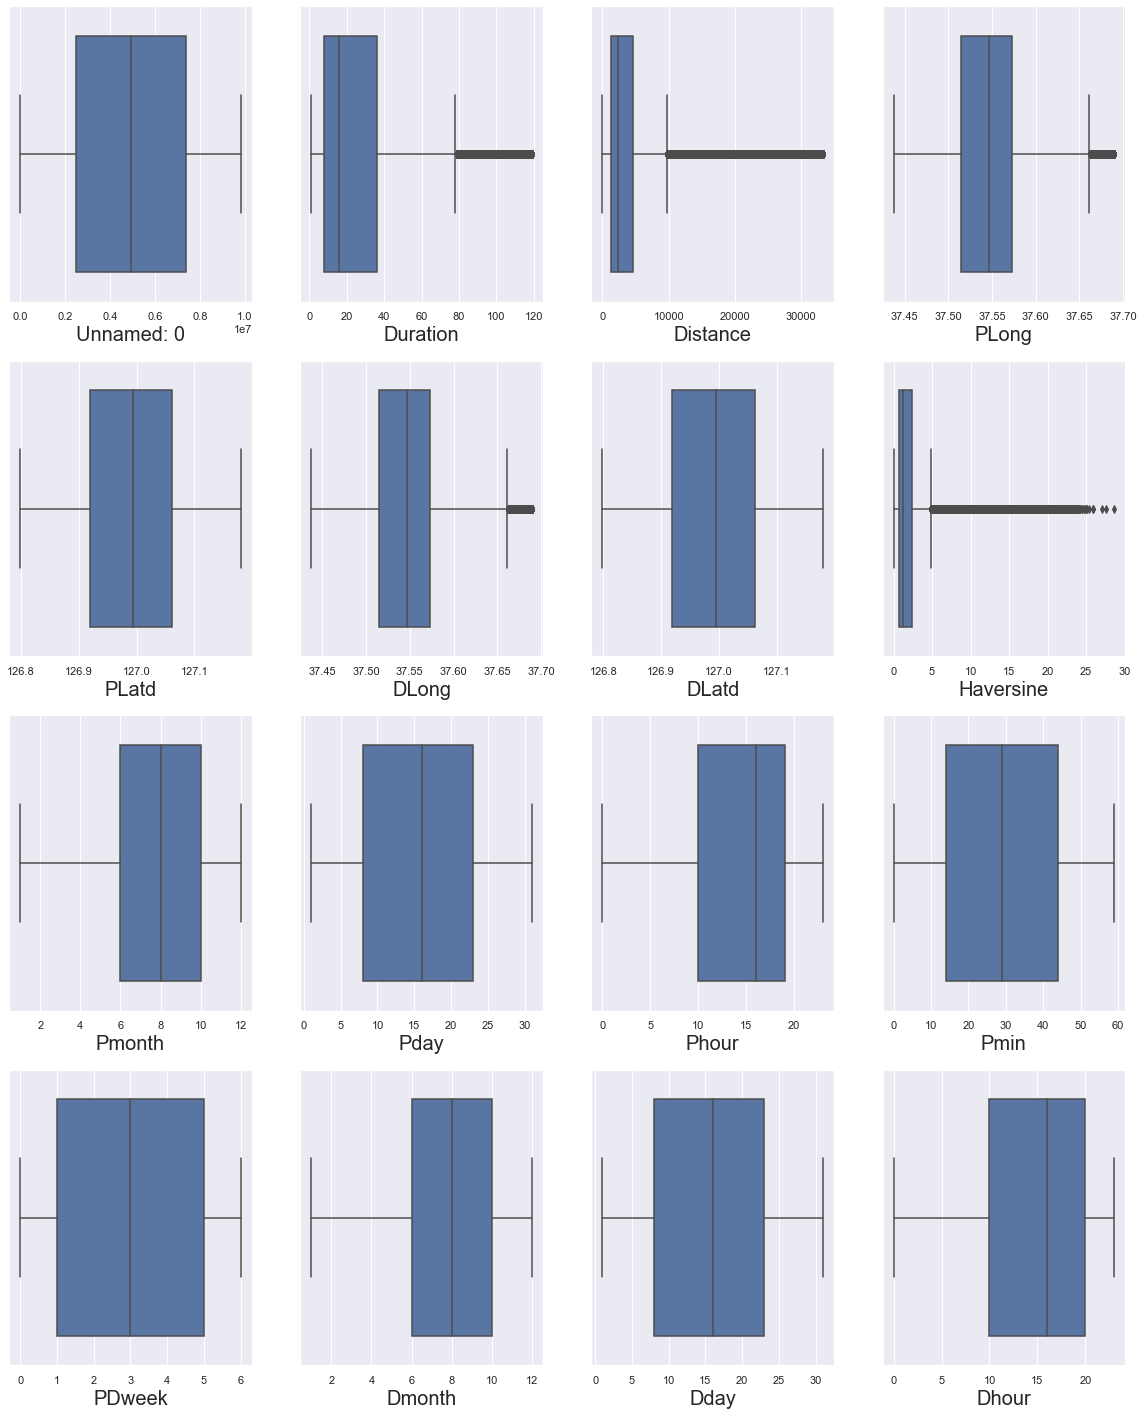

In [38]:

##Boxplot to check the outliers

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in trip_dataset:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(trip_dataset[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [39]:
q = trip_dataset['Distance'].quantile(0.90)
# we are removing the top 10% data from the Distance column
data_cleaned = trip_dataset[trip_dataset['Distance']<q]
q = data_cleaned['PLong'].quantile(0.98)
# we are removing the top 2% data from the Plong column
data_cleaned  = data_cleaned[data_cleaned['PLong']<q]
q = data_cleaned['DLong'].quantile(0.98)
# we are removing the top 2% data from the DLong column
data_cleaned  = data_cleaned[data_cleaned['DLong']<q]
q = data_cleaned['Haversine'].quantile(0.90)
# we are removing the top 10% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Haversine']<q]


In [40]:
data_cleaned.shape

(7458850, 26)

In [41]:
## Checking the correlation of the features

data_cleaned.corr()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
Unnamed: 0,1.000000,-0.049354,-0.055714,-0.024178,0.012217,-0.023955,0.012105,-0.015991,0.983904,0.031252,...,0.000331,-0.012418,-0.211205,-0.007102,-0.179950,-0.006229,-0.159750,0.014499,-0.231446,-0.030676
Duration,-0.049354,1.000000,0.650590,-0.029630,0.012870,-0.029191,0.013200,0.035341,-0.040223,-0.008498,...,-0.010181,0.072776,0.106366,-0.006715,0.076970,-0.106178,0.100419,-0.011585,0.115247,-0.002015
Distance,-0.055714,0.650590,1.000000,-0.039671,0.008602,-0.040359,0.008535,0.405546,-0.046619,-0.008929,...,-0.001885,0.069912,0.084129,-0.009095,0.037359,-0.052211,0.017921,-0.014348,0.064468,-0.023900
PLong,-0.024178,-0.029630,-0.039671,1.000000,0.062304,0.971409,0.062415,-0.008977,-0.024895,-0.000611,...,0.000349,-0.000814,-0.003108,-0.000950,0.005666,-0.003839,0.018249,-0.002501,0.004926,0.008340
PLatd,0.012217,0.012870,0.008602,0.062304,1.000000,0.062343,0.989560,0.012338,0.012896,0.000432,...,-0.000907,0.007394,0.004511,-0.003977,-0.001599,-0.003930,-0.002718,-0.004350,0.002046,-0.002303
DLong,-0.023955,-0.029191,-0.040359,0.971409,0.062343,1.000000,0.063262,-0.011363,-0.024600,-0.000598,...,-0.000030,-0.001018,-0.002234,-0.001219,0.005939,-0.003929,0.016730,-0.002453,0.004978,0.007880
DLatd,0.012105,0.013200,0.008535,0.062415,0.989560,0.063262,1.000000,0.011957,0.012789,0.000366,...,-0.001117,0.007498,0.004880,-0.003954,-0.001093,-0.004534,-0.003007,-0.004420,0.002194,-0.002292
Haversine,-0.015991,0.035341,0.405546,-0.008977,0.012338,-0.011363,0.011957,1.000000,-0.014186,-0.001194,...,0.009797,-0.001797,-0.013922,-0.003117,-0.030354,0.041546,-0.073835,-0.005355,-0.041111,-0.017821
Pmonth,0.983904,-0.040223,-0.046619,-0.024895,0.012896,-0.024600,0.012789,-0.014186,1.000000,-0.066267,...,-0.000179,-0.008018,-0.105110,-0.005436,-0.174720,0.020627,-0.136217,-0.010372,-0.137225,-0.068437
Pday,0.031252,-0.008498,-0.008929,-0.000611,0.000432,-0.000598,0.000366,-0.001194,-0.066267,1.000000,...,0.001112,0.012003,-0.028342,0.010534,-0.022629,-0.038460,-0.003382,0.054523,-0.021896,0.080119


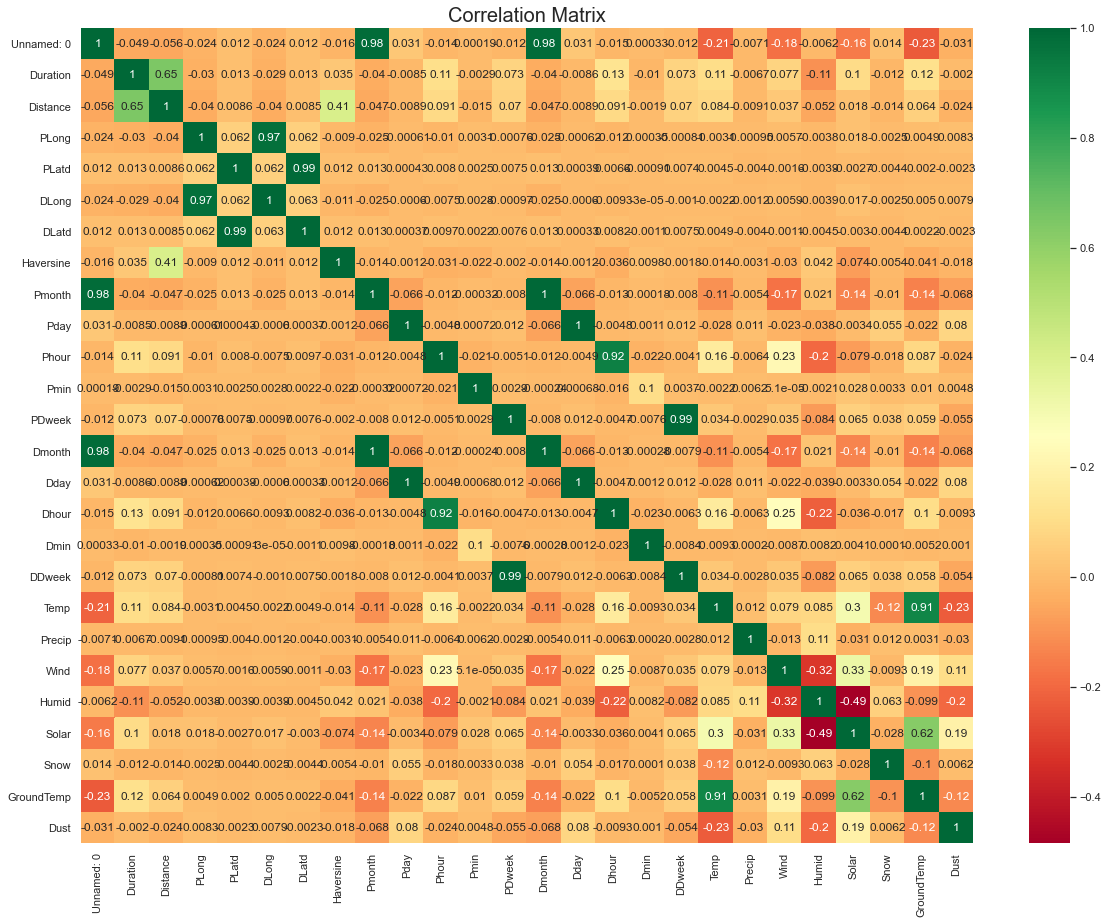

In [42]:
plt.figure(figsize=(20,15))
sns.heatmap(data_cleaned.corr(),cmap='RdYlGn', annot = True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

 PLong and DLong are highly correlated positively
 
 Platd and Dlatd  are highly correlated positively
 
 Phour and Dhour  are highly correlated positively
 
 PDWeek and DDWeek  are highly correlated positively
 
 GroundTemp and Temp are highly correlated Positively

 Solar and Humid are negatively correlated
 
 Wind and Humid are negatively correlated
 
 
 Distance is directly correlated to Duration

In [43]:
data_cleaned.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
5,5,8,1800,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [44]:
data_cleaned.drop("Unnamed: 0", axis=1,inplace=True)

In [45]:
data_cleaned.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
5,8,1800,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [46]:
columns=["DLong","DLatd","Dhour","DDweek", "Temp"]
data_cleaned.drop(columns=columns, axis=1, inplace=True)

In [47]:

data_cleaned.shape

(7458850, 20)

In [48]:
#Taking a sample of the entire dataset for modelling

seoul_data = data_cleaned.sample(n=150000, replace=True,random_state=20)
seoul_data.reset_index(drop=True,inplace=True)
seoul_data

,Duration,Distance,PLong,PLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dmin,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,14,3120,37.578220,126.894470,2.632953,4,27,14,9,4,4,27,24,0.0,2.8,32.0,2.91,0.0,38.5,59.0
1,35,3710,37.568420,126.899429,2.358399,7,14,22,6,5,7,14,42,0.0,2.7,70.0,0.00,0.0,25.9,17.0
2,16,3420,37.471165,126.937019,1.938504,10,2,8,37,1,10,2,53,0.0,0.9,69.0,0.49,0.0,11.1,13.0
3,18,610,37.515831,127.106796,0.000000,10,9,16,22,1,10,9,26,0.0,1.4,39.0,0.89,0.0,19.6,28.0
4,7,1020,37.530338,126.838257,0.791537,8,18,21,46,5,8,18,54,0.0,0.9,48.0,0.00,0.0,26.8,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,21,5050,37.488991,126.916382,3.269386,10,3,8,15,2,10,3,36,0.0,1.0,73.0,0.49,0.0,11.4,22.0
149996,27,2820,37.494141,126.889984,2.067280,10,3,3,31,2,10,3,59,0.0,0.6,78.0,0.00,0.0,10.9,26.0
149997,8,1390,37.519363,126.926048,1.163775,2,24,13,31,5,2,24,40,0.0,2.1,29.0,2.08,0.0,11.0,73.0
149998,9,2170,37.495781,126.890121,1.549949,8,30,20,19,3,8,30,29,0.0,1.2,70.0,0.00,0.0,24.0,15.0


In [49]:
data_cleaned.describe

<bound method NDFrame.describe of          Duration  Distance      PLong       PLatd  Haversine  Pmonth  Pday  \
0               3        50  37.544666  126.888359   0.000000       1     1   
2               8      1390  37.544590  127.057083   0.913702       1     1   
3               8      1820  37.571102  127.023560   1.468027       1     1   
4               4       850  37.573242  127.015907   0.823227       1     1   
5               8      1800  37.571102  127.023560   1.468027       1     1   
...           ...       ...        ...         ...        ...     ...   ...   
9601132        70      7410  37.549767  126.933174   0.000000      12    31   
9601133        52      2270  37.540089  127.073746   1.041830      12    31   
9601134        67      6930  37.562607  127.051308   0.000000      12    31   
9601136       118      2730  37.506199  127.003944   1.389156      12    31   
9601138       116      1410  37.585655  127.075050   0.000000      12    31   

         Phour  P

In [50]:
seoul_data.head()

,Duration,Distance,PLong,PLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dmin,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,14,3120,37.578220,126.894470,2.632953,4,27,14,9,4,4,27,24,0.0,2.8,32.0,2.91,0.0,38.5,59.0
1,35,3710,37.568420,126.899429,2.358399,7,14,22,6,5,7,14,42,0.0,2.7,70.0,0.00,0.0,25.9,17.0
2,16,3420,37.471165,126.937019,1.938504,10,2,8,37,1,10,2,53,0.0,0.9,69.0,0.49,0.0,11.1,13.0
3,18,610,37.515831,127.106796,0.000000,10,9,16,22,1,10,9,26,0.0,1.4,39.0,0.89,0.0,19.6,28.0
4,7,1020,37.530338,126.838257,0.791537,8,18,21,46,5,8,18,54,0.0,0.9,48.0,0.00,0.0,26.8,19.0


In [51]:
columns = ["Pmonth","Dmonth","Pday","Dday"]
seoul_data.drop(columns=columns, axis=1, inplace=True)

In [52]:
## Importing necessary Libraries for Modeling

from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
X=seoul_data.drop("Duration",axis=1)
y=seoul_data["Duration"]

In [54]:
## Normalising the data

##scaler =StandardScaler()

##X_scaled = scaler.fit_transform(X)

In [55]:
##from statsmodels.stats.outliers_influence import variance_inflation_factor
##variables = X_scaled
##vif = pd.DataFrame()
##vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
##vif["Features"] = X.columns
##vif 

As we can see there is no multicollinearity between the data

In [56]:
## Performing a Train- Test Split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=20)

In [57]:
## Linear Regression

regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
regression.score(X_train,y_train)

0.4858124130229245

In [59]:
regression.score(X_test,y_test)

0.4909114441071136

In [60]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [61]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

3.791313360985444e-05

In [62]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=3.791313360985444e-05, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lasso_reg.score(X_test, y_test)

0.4909119065219034

In [64]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([6.98061717, 9.57840869, 4.40067234, 7.68481831, 3.11807109,
       9.34340086, 4.8489546 , 2.25967526, 4.01186505, 2.67040558,
       0.44387095, 0.13121042, 9.0012923 , 0.65836224, 7.55092735,
       8.65350435, 1.90558439, 4.13994371, 5.57886602, 3.81847519,
       8.8852363 , 8.23099683, 0.9971937 , 3.87976703, 8.61002743,
       2.58704441, 8.33763846, 1.50419853, 4.202112  , 9.74288971,
       9.23995001, 1.29248631, 0.0423405 , 3.8332953 , 7.96551778,
       4.7311223 , 8.90396087, 0.85995784, 3.58843245, 5.30428905,
       8.62823352, 2.98639449, 8.91822036, 5.72717116, 4.53573918,
       0.64479711, 8.55875836, 6.20552149, 9.89438615, 3.80839841]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [65]:
ridgecv.alpha_

0.04234049589185829

In [66]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.04234049589185829, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
ridge_model.score(X_test, y_test)

0.49091145285833837

In [68]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [69]:
elasticCV.alpha_

41.04455704767624

In [70]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=41.04455704767624, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [71]:
elasticnet_reg.score(X_test, y_test)

0.4251144679808759

In [72]:
## Importing Necessary Libraries

from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics

In [73]:
## Linear Regression

pipeline_lr=Pipeline([('lr_regressor',LinearRegression())])

In [74]:
## Support Vector Machines

pipeline_svr=Pipeline([('svr_regressor',SVR())])

In [75]:
## Decision Tree


pipeline_dt=Pipeline([('dt_regressor',DecisionTreeRegressor(max_depth=3,random_state=42))])

In [76]:
## Random Forest 

pipeline_rf=Pipeline([('rf_regressor',RandomForestRegressor(random_state = 42))])

In [77]:
## XGBoost

pipeline_xgb=Pipeline([('xgb_regressor',XGBRegressor(random_state=42))])

In [78]:
pipelines=[pipeline_lr,pipeline_svr,pipeline_dt,pipeline_rf,pipeline_xgb]

In [79]:
best_accuracy_score=0.0
best_Regressor=0
best_pipeline=""

In [80]:
pipe_dic={0:'Linear regression',1:'SVR',2:'Decision Tree',3:'Random Forest',4:'XGBoost'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)

In [81]:
## Printing all the accuracy of the models in Pipeline for the Training and Test Set

for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dic[i],model.score(X_test,y_test)))
    print("{} Train Accuracy: {}".format(pipe_dic[i],model.score(X_train,y_train)))
    print("{} R2 Score: {}".format(pipe_dic[i],metrics.r2_score(y_test,y_pred)*100))

Linear regression Test Accuracy: 0.4909114441071136
Linear regression Train Accuracy: 0.4858124130229245
Linear regression R2 Score: 68.71254336329038
SVR Test Accuracy: 0.3831606064168498
SVR Train Accuracy: 0.375237149119355
SVR R2 Score: 68.71254336329038
Decision Tree Test Accuracy: 0.490098529493138
Decision Tree Train Accuracy: 0.48578654790035636
Decision Tree R2 Score: 68.71254336329038
Random Forest Test Accuracy: 0.6027465813889529
Random Forest Train Accuracy: 0.9439480886909779
Random Forest R2 Score: 68.71254336329038
XGBoost Test Accuracy: 0.6871254336329038
XGBoost Train Accuracy: 0.7830082021565082
XGBoost R2 Score: 68.71254336329038


In [82]:
## Finding and printing the model with best accuracy

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy_score:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy score:{}'.format(pipe_dic[best_regressor]))

Regressor with best accuracy score:XGBoost


In [83]:
best_pipeline

Pipeline(memory=None,
         steps=[('xgb_regressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, gamma=0, gpu_id=-1,
                              importance_type='gain',
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=4, num_parallel_tree=1,
                              objective='reg:squarederror', random_state=42,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                              subsample=1, tree_method='exact',
                              validate_parameters=1, verbosity=None))],
         verbose=False)

In [84]:
print(pipelines[4].steps[0][1])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)


In [104]:
final_model = pipelines[4].steps[0][1]
final_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [105]:
### Saving the files
import joblib

with open("./final_bestmodel11.joblib", 'wb') as x:
    joblib.dump(final_model, x, compress=3)



OSError: [Errno 22] Invalid argument: './final_bestmodel11.joblib'